In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [105]:
df = pd.read_csv('task3.csv', index_col=0)
mileage_avg = np.average(df['mileage'][df['mileage'].notna()])
print(mileage_avg)
df['mileage'] = df['mileage'].fillna(mileage_avg)

72539.37565084227


In [106]:
df['retention_rate'] = (df['model_price'] - df['price']) / (df['model_price'] * df['mileage'])
df['retention_rate']

0        0.000010
1        0.000004
2        0.000006
3        0.000018
4        0.000006
           ...   
16779    0.000009
16780    0.000004
16781    0.000009
16782    0.000006
16783   -0.000202
Name: retention_rate, Length: 16784, dtype: float64

In [107]:
# remove outlier based on z-score
before_len_1 = len(df)
df = df[df['retention_rate'] > 0]
before_len_2 = len(df)
df = df[(np.abs(stats.zscore(df['retention_rate'])) < 0.8)]
print(before_len_1, before_len_2, len(df))

14495 14457


In [108]:
make_retention_rate = df.groupby(['make']).mean()['retention_rate'].sort_values(ascending=False)
count = df.groupby(['make']).count()['retention_rate']
rdf = pd.DataFrame({'retention_rate': make_retention_rate, 'count': count})
rdf.sort_values(by='retention_rate')
rdf.head()

,retention_rate,count
alfa romeo,0.000005,11
alpine,0.000004,1
audi,0.000019,672
austin,0.000009,7
bentley,0.000039,84


In [123]:
rdf_cleaned = rdf[(np.abs(stats.zscore(rdf['count'])) < 0.35)]
print(len(rdf), len(rdf_cleaned))

73 20


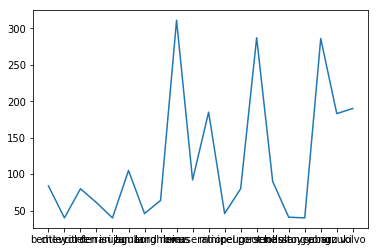

In [127]:
plt.barh(rdf_cleaned.index, rdf_cleaned['retention_rate'] * 1e6)
# plt.plot(rdf_cleaned.index, rdf_cleaned['count'])
plt.show()